In [1]:
import numpy 
import os
import ast
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

#from wquantiles import quantile
from openfisca_survey_manager.utils import asof

#from openfisca_france_indirect_taxation import FranceIndirectTaxationTaxBenefitSystem
#from openfisca_france_indirect_taxation.surveys import SurveyScenario
#from openfisca_france_indirect_taxation.calibration import get_inflators_by_year_energy
#from openfisca_france_indirect_taxation.almost_ideal_demand_system.utils import add_niveau_vie_decile

from openfisca_france_indirect_taxation.examples.utils_example import df_weighted_average_grouped
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Reform_carbon_tax import carbon_tax_rv
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Simulation_taxe_energie_winners_losers import (
    simulate_reformes_energie,
    run_all_elasticities)
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Graph_utils import (
    graph_CO2_emissions,
    graph_delta_CO2,
    graph_share_co2_emissions,
    graph_share_emissions_reduction,
    graph_ratio_emissions_reduction,
    graph_winners_losers,
    graph_net_transfers,
    graph_net_transfers_uc,
    graph_effort_rate,
    quantiles_for_boxplot,
    boxplot_effort_rate,
    boxplot_net_transfers,
    boxplot_net_transfers_uc
    )

In [2]:
data_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Data"
output_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Output"
sns.set_style("whitegrid")

In [4]:
df_elasticities = pd.read_csv(os.path.join(data_path,'Reform_parameters/Elasticities_literature.csv'), sep = ";")
df_elasticities = df_elasticities.astype({'ref_elasticity': str, 'elas_price_1_1': float , 'elas_price_2_2' : float ,'elas_price_3_3' : float })

# exemple
elasticites_douenne = df_elasticities[df_elasticities['ref_elasticity'] == 'Douenne (2020)'] 

In [4]:
to_graph, menages_reform, df_sum = run_all_elasticities(data_elasticities= df_elasticities, 
                                                        year = 2019, 
                                                        reform = carbon_tax_rv,
                                                        bonus_cheques_uc=True)
menages_reform.to_csv(os.path.join(output_path,'Data/menages_reform.csv'))
to_graph.to_csv(os.path.join(output_path,'Data/to_graph.csv'))
df_sum.to_csv(os.path.join(output_path,'Data/df_sum.csv'))

In [3]:
menages_reform = pd.read_csv(os.path.join(output_path,'Data/menages_reform.csv'), index_col = 0)
to_graph = pd.read_csv(os.path.join(output_path,'Data/to_graph.csv'), index_col = 0)
df_sum = pd.read_csv(os.path.join(output_path,'Data/df_sum.csv'), index_col = 0)

## Distributive effects
### Vertical effects

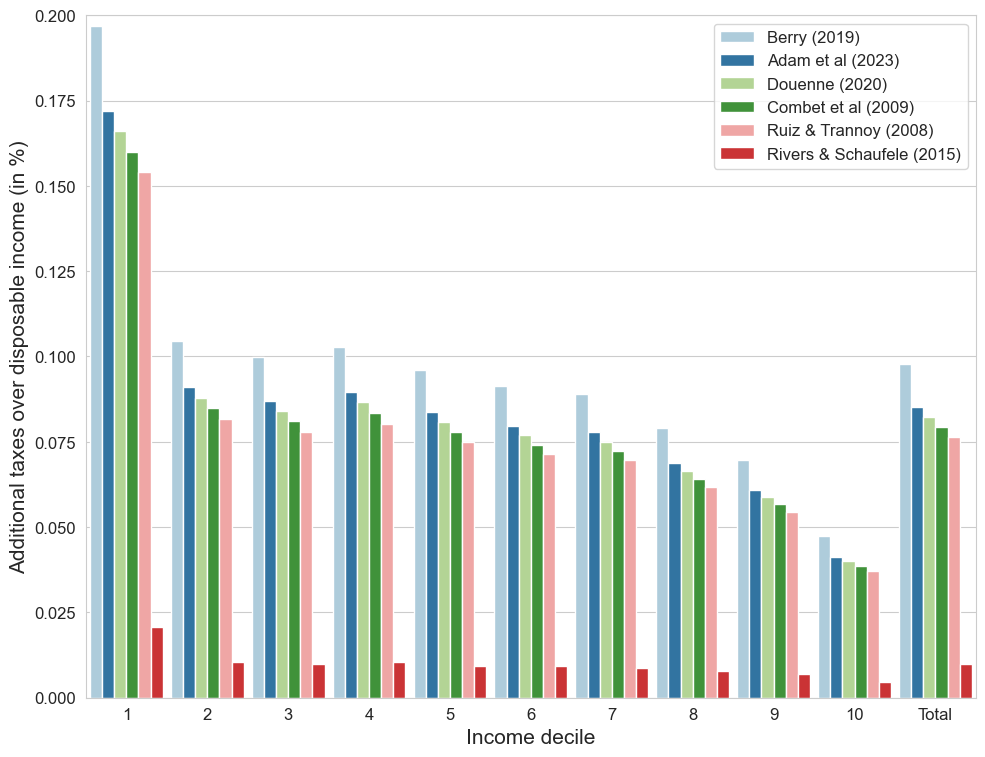

In [4]:
graph_effort_rate(to_graph,carbon_tax_rv,elas_ext = False,elas_vect = False,bonus_cheques_uc=True)

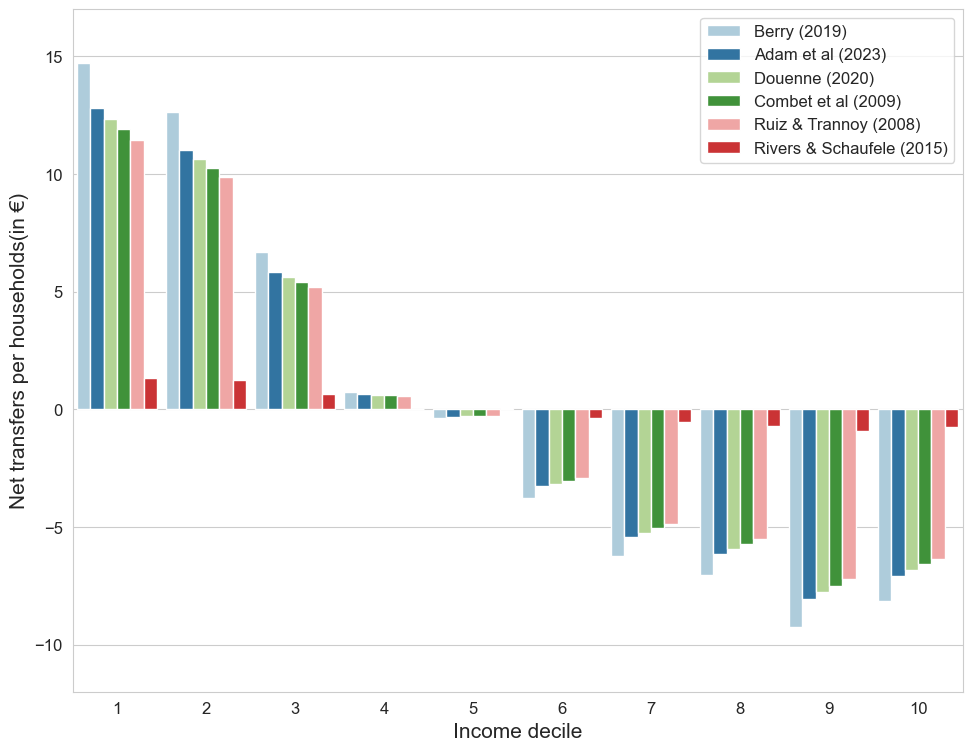

In [16]:
graph_net_transfers(to_graph,carbon_tax_rv,elas_ext=False,elas_vect = False,bonus_cheques_uc=True)

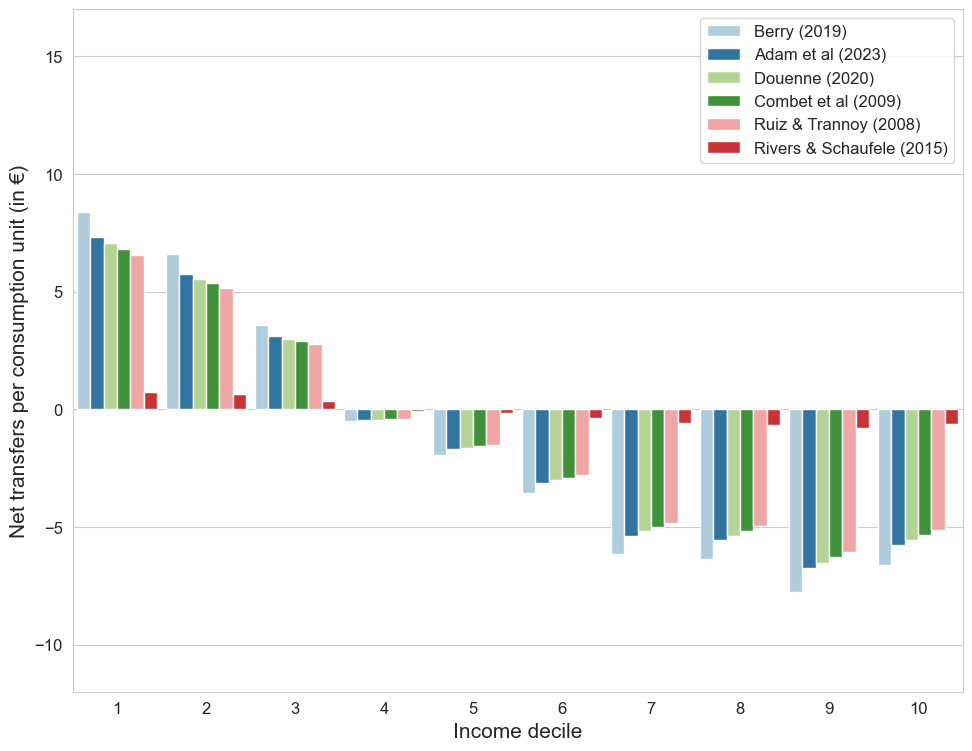

In [17]:
graph_net_transfers_uc(to_graph,carbon_tax_rv,elas_ext=False,elas_vect = False,bonus_cheques_uc=True)

### Horizontal effects

c:\users\veve1\onedrive\documents\ensae 3a\memoire mie\openfisca-france-indirect-taxation\openfisca_france_indirect_taxation\projects\Master_Thesis_Herve\Graph_utils.py:393: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.scatterplot(data = quantiles_to_plot, x='plot_decile', y='Effort_rate', hue = 'ref_elasticity',


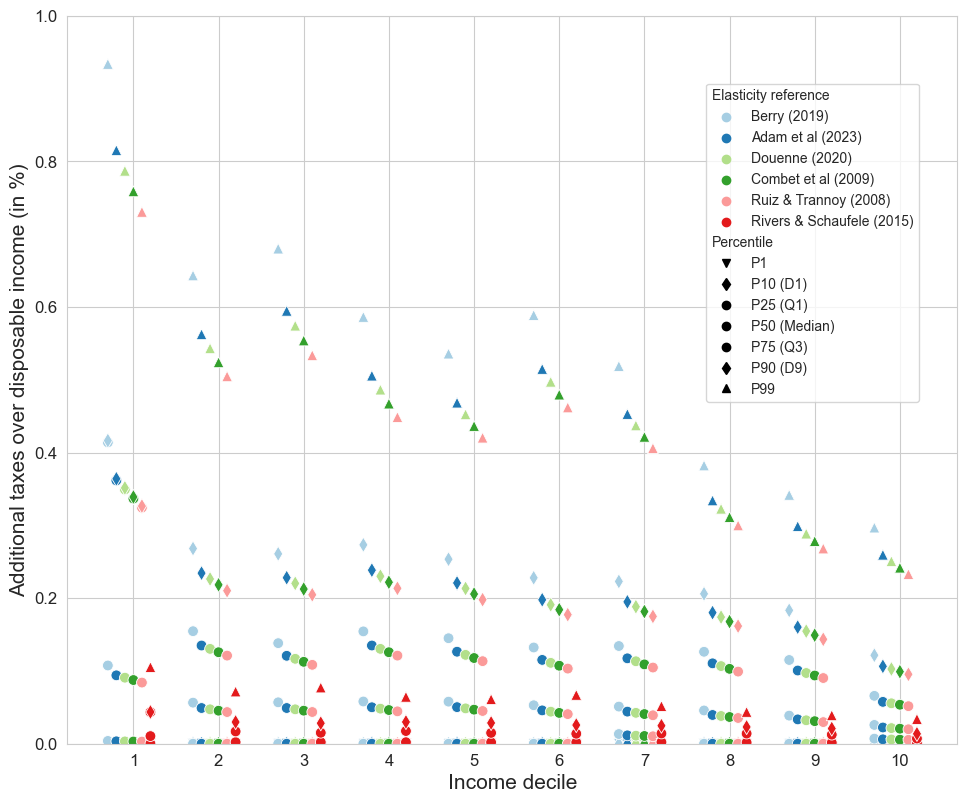

In [6]:
boxplot_effort_rate(menages_reform,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=True)

In [ ]:
hue_order = ['Berry (2019)', 'Adam et al (2023)', 'Douenne (2020)', 'Combet et al (2009)', 'Ruiz & Trannoy (2008)','Rivers & Schaufele (2015)']
quantile_effort_rate = quantiles_for_boxplot(menages_reform,'Effort_rate',hue_order)
quantile_effort_rate[quantile_effort_rate['niveau_vie_decile'] == 2]

c:\users\veve1\onedrive\documents\ensae 3a\memoire mie\openfisca-france-indirect-taxation\openfisca_france_indirect_taxation\projects\Master_Thesis_Herve\Graph_utils.py:300: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.scatterplot(data = quantiles_to_plot , x='plot_decile', y='Net_transfers_reform', hue = 'ref_elasticity',


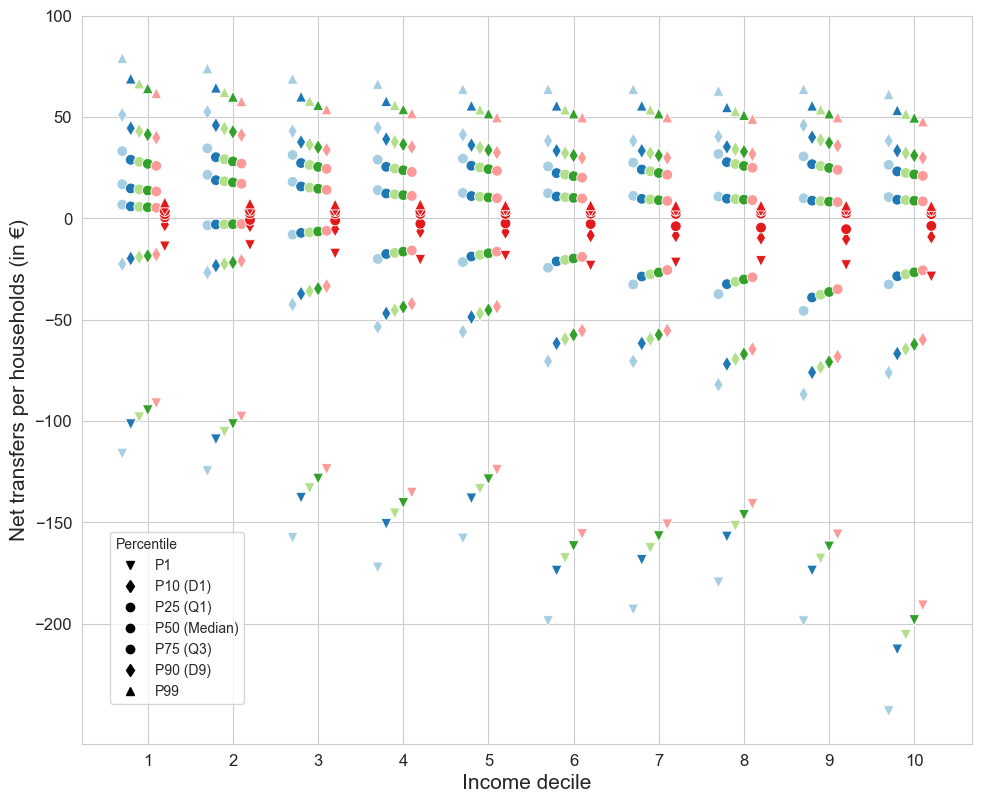

In [7]:
boxplot_net_transfers(menages_reform,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=True)

c:\users\veve1\onedrive\documents\ensae 3a\memoire mie\openfisca-france-indirect-taxation\openfisca_france_indirect_taxation\projects\Master_Thesis_Herve\Graph_utils.py:345: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.scatterplot(data = quantiles_to_plot , x='plot_decile', y='Net_transfers_reform_uc', hue = 'ref_elasticity',


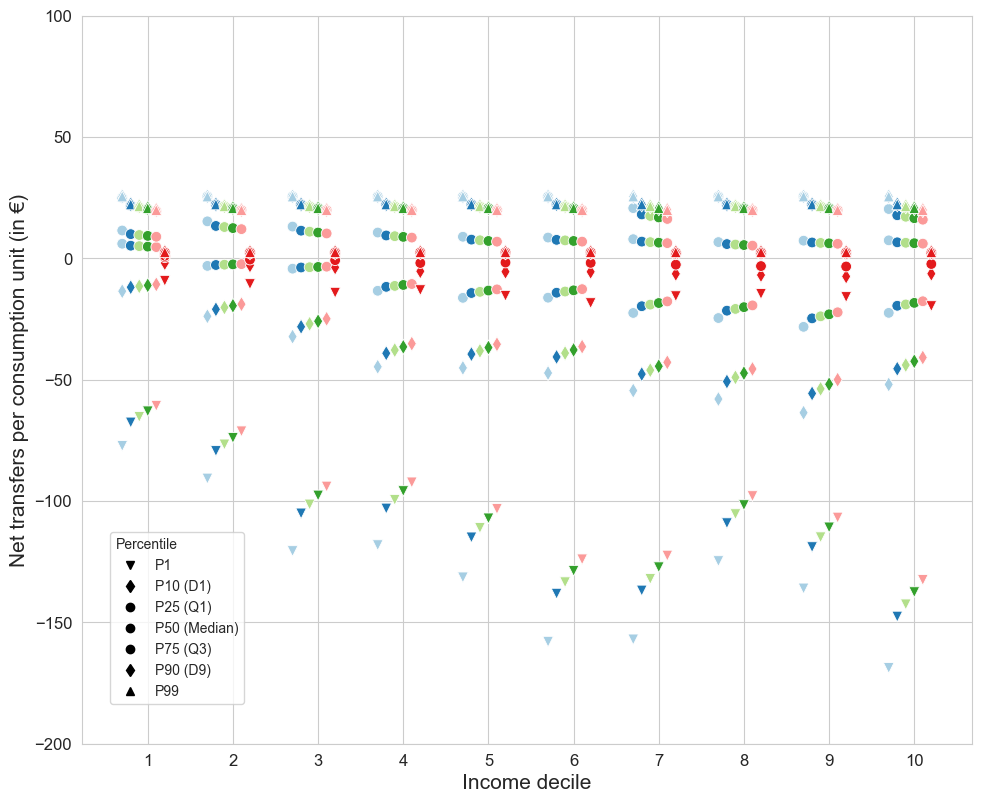

In [8]:
boxplot_net_transfers_uc(menages_reform,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=True)

In [ ]:
quantile_net_transfers = quantiles_for_boxplot(menages_reform,'Net_transfers_reform',hue_order)
quantile_net_transfers[quantile_net_transfers['niveau_vie_decile']== 10]

### Implications for political support

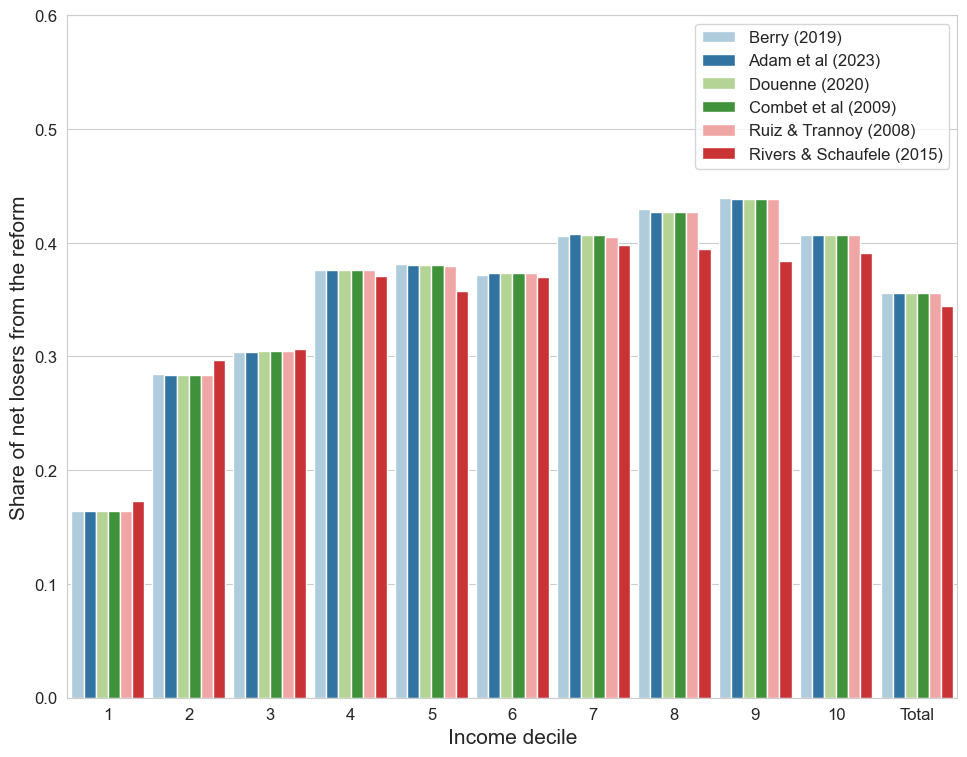

In [9]:
graph_winners_losers(to_graph,carbon_tax_rv,elas_ext=False,elas_vect= False,bonus_cheques_uc=True)

## Environmental effects

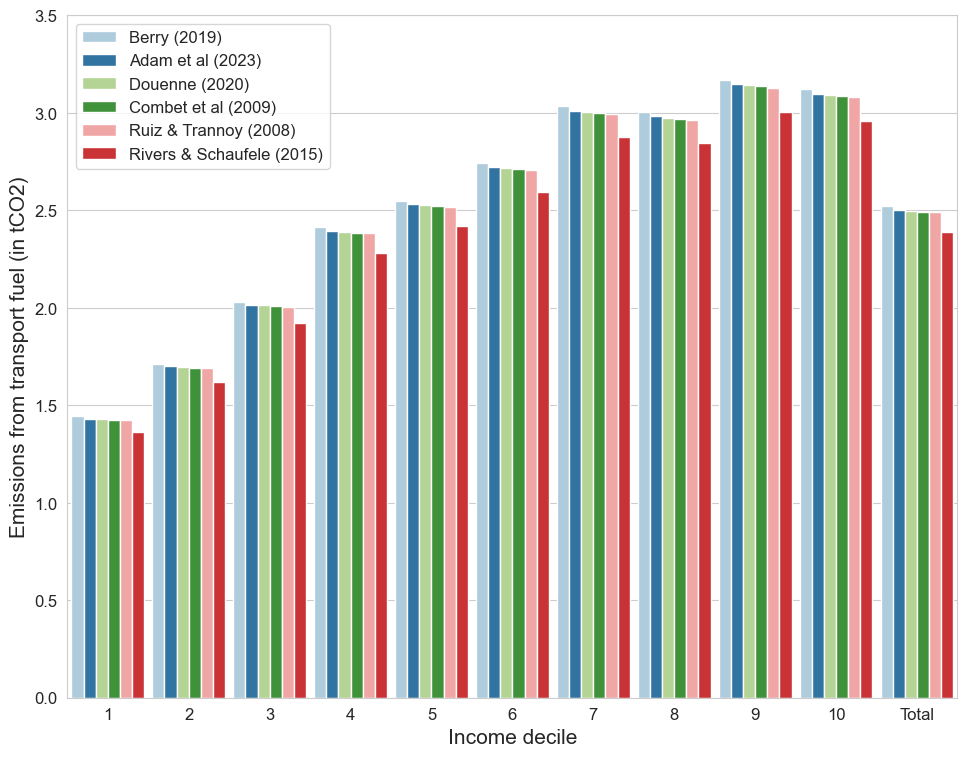

In [10]:
graph_CO2_emissions(to_graph,carbon_tax_rv,elas_ext=False,elas_vect= False,bonus_cheques_uc=True)

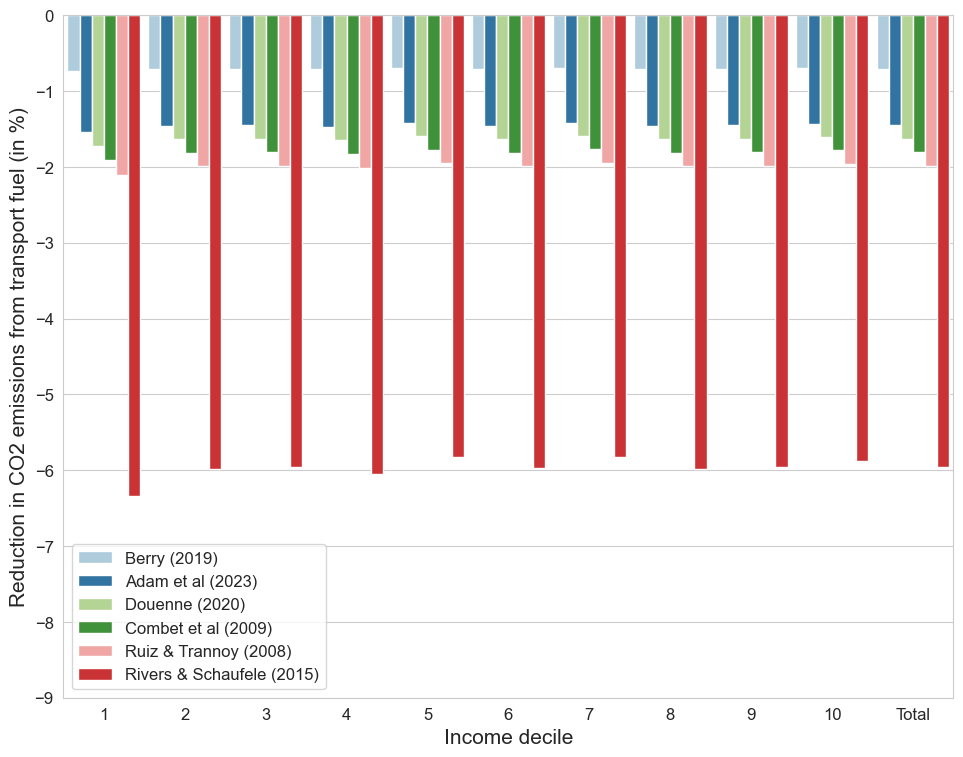

In [11]:
graph_delta_CO2(to_graph,carbon_tax_rv,elas_ext=False,elas_vect= False,bonus_cheques_uc=True)

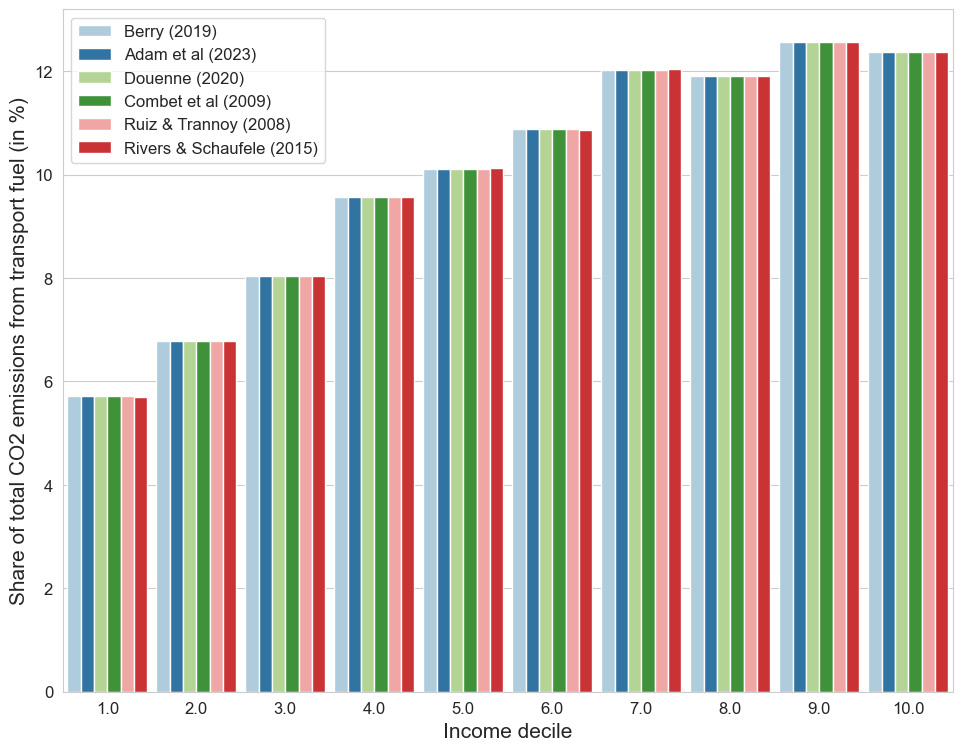

In [12]:
graph_share_co2_emissions(df_sum,carbon_tax_rv,elas_ext=False,elas_vect= False,bonus_cheques_uc=True)

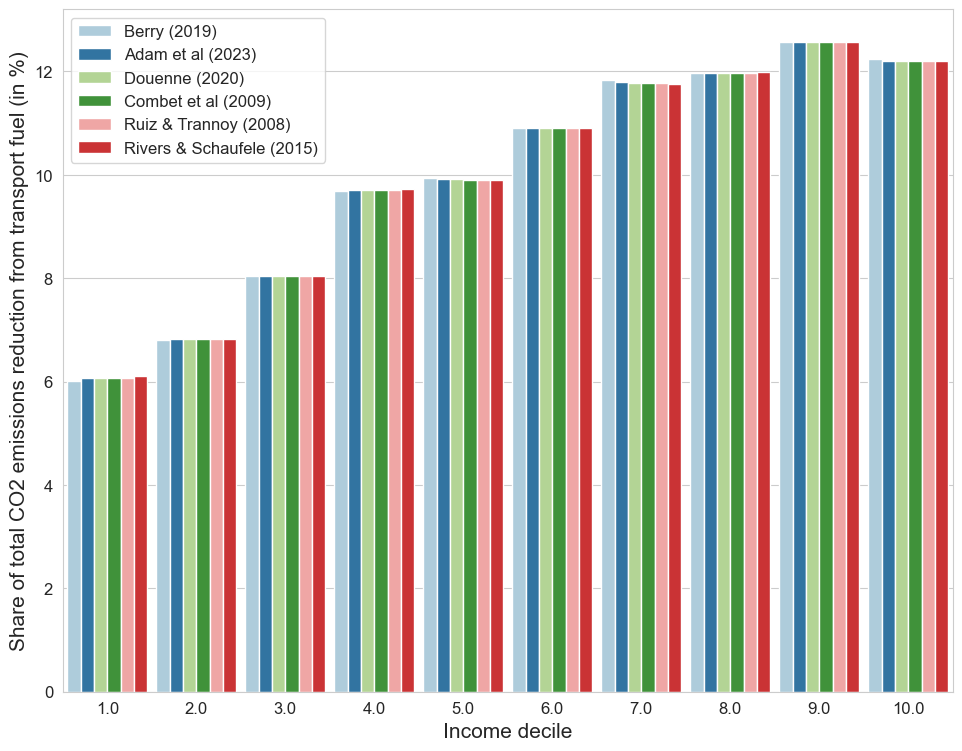

In [13]:
graph_share_emissions_reduction(df_sum,carbon_tax_rv,elas_ext=False,elas_vect= False,bonus_cheques_uc=True)

### With bonus_cheques_energie by households

In [ ]:
to_graph_menage, menages_reform_menage, df_sum_menage = run_all_elasticities(data_elasticities = df_elasticities, year = 2019, reform = carbon_tax_rv, bonus_cheques_uc= False)

In [ ]:
graph_effort_rate(to_graph_menage,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=False)

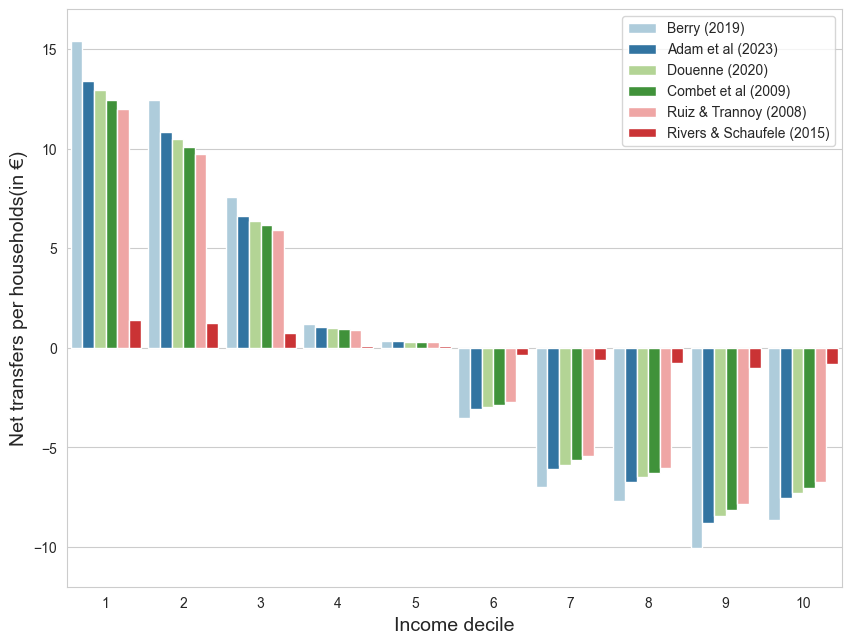

In [18]:
graph_net_transfers(to_graph_menage,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=False)

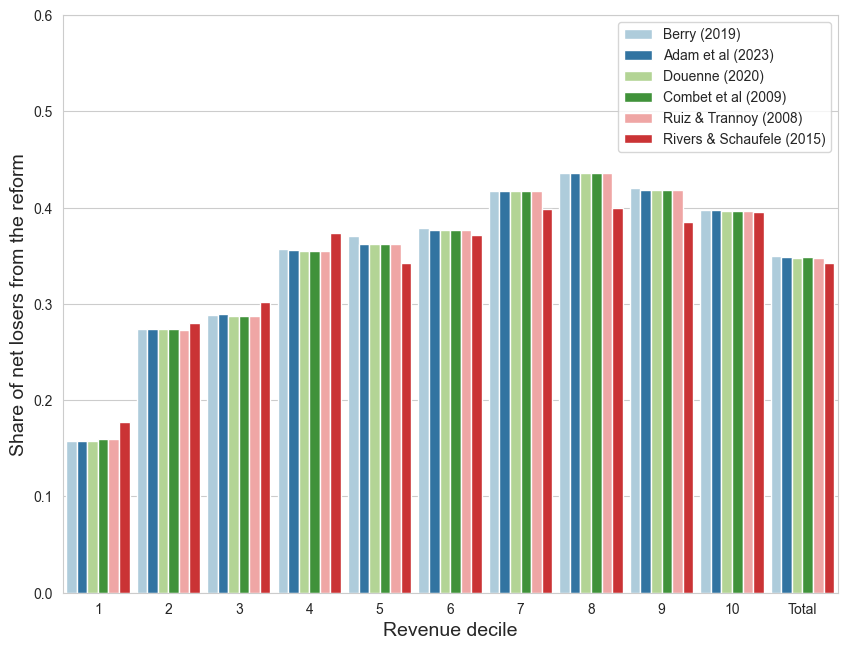

In [20]:
graph_winners_losers(to_graph_menage,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=False)

## A creuser !

In [33]:
menages_reform

,ticpe_totale_carbon_tax_rv,bonus_cheques_energie_uc,niveau_vie_decile,ocde10,ticpe_totale,ref_elasticity,bonus_cheques_energie_menage,contributions_reforme,pondmen,rev_disponible,emissions_CO2_carburants_carbon_tax_rv,emissions_CO2_carburants,Effort_rate,Net_transfers_reform,Is_losers,Reduction_CO2
0.0,1351.790283,31.036646,7,1.500000,1271.416870,Combet et al (2009),31.698721,80.373413,1443,50823.539062,5316.644043,5432.791016,0.158142,-49.336767,True,-2.137888
1.0,774.876099,20.691097,3,1.000000,728.804199,Combet et al (2009),31.698721,46.071899,2407,23046.730469,3047.617432,3114.195557,0.199906,-25.380802,True,-2.137892
2.0,520.504822,53.796852,2,2.600000,489.557159,Combet et al (2009),31.698721,30.947662,968,50842.218750,2047.165771,2091.887939,0.060870,22.849190,False,-2.137885
3.0,412.777191,31.036646,3,1.500000,389.166260,Combet et al (2009),31.698721,23.610931,2076,35482.238281,1603.742065,1637.869019,0.066543,7.425714,False,-2.083619
4.0,1245.289062,41.382195,6,2.000000,1171.247925,Combet et al (2009),31.698721,74.041138,1364,61247.660156,4897.770508,5004.766602,0.120888,-32.658943,True,-2.137884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12077.0,0.000000,3.796148,7,1.500000,0.000000,Rivers & Schaufele (2015),3.877127,0.000000,1743,55800.566406,0.000000,0.000000,0.000000,3.796148,False,0.000000
12078.0,0.000000,3.796148,8,1.500000,0.000000,Rivers & Schaufele (2015),3.877127,0.000000,1571,62176.507812,0.000000,0.000000,0.000000,3.796148,False,0.000000
12079.0,0.000000,2.530765,2,1.000000,0.000000,Rivers & Schaufele (2015),3.877127,0.000000,1087,19437.675781,0.000000,0.000000,0.000000,2.530765,False,0.000000
12080.0,0.000000,3.796148,3,1.500000,0.000000,Rivers & Schaufele (2015),3.877127,0.000000,1407,33660.191406,0.000000,0.000000,0.000000,3.796148,False,0.000000


In [32]:
menages_reform_menage

,emissions_CO2_carburants,bonus_cheques_energie_uc,niveau_vie_decile,ticpe_totale_carbon_tax_rv,ref_elasticity,ticpe_totale,pondmen,ocde10,bonus_cheques_energie_menage,rev_disponible,contributions_reforme,emissions_CO2_carburants_carbon_tax_rv,Effort_rate,Net_transfers_reform,Is_losers,Reduction_CO2
0.0,5432.791016,31.036646,7,1351.790283,Combet et al (2009),1271.416870,1443,1.500000,31.698721,50823.539062,80.373413,5316.644043,0.158142,-48.674692,True,-2.137888
1.0,3114.195557,20.691097,3,774.876099,Combet et al (2009),728.804199,2407,1.000000,31.698721,23046.730469,46.071899,3047.617432,0.199906,-14.373178,True,-2.137892
2.0,2091.887939,53.796852,2,520.504822,Combet et al (2009),489.557159,968,2.600000,31.698721,50842.218750,30.947662,2047.165771,0.060870,0.751059,False,-2.137885
3.0,1637.869019,31.036646,3,412.777191,Combet et al (2009),389.166260,2076,1.500000,31.698721,35482.238281,23.610931,1603.742065,0.066543,8.087790,False,-2.083619
4.0,5004.766602,41.382195,6,1245.289062,Combet et al (2009),1171.247925,1364,2.000000,31.698721,61247.660156,74.041138,4897.770508,0.120888,-42.342417,True,-2.137884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12077.0,0.000000,3.796148,7,0.000000,Rivers & Schaufele (2015),0.000000,1743,1.500000,3.877127,55800.566406,0.000000,0.000000,0.000000,3.877127,False,0.000000
12078.0,0.000000,3.796148,8,0.000000,Rivers & Schaufele (2015),0.000000,1571,1.500000,3.877127,62176.507812,0.000000,0.000000,0.000000,3.877127,False,0.000000
12079.0,0.000000,2.530765,2,0.000000,Rivers & Schaufele (2015),0.000000,1087,1.000000,3.877127,19437.675781,0.000000,0.000000,0.000000,3.877127,False,0.000000
12080.0,0.000000,3.796148,3,0.000000,Rivers & Schaufele (2015),0.000000,1407,1.500000,3.877127,33660.191406,0.000000,0.000000,0.000000,3.877127,False,0.000000


In [ ]:
boxplot_net_transfers(menages_reform_menage, carbon_tax_rv, elas_vect=False, bonus_cheques_uc=False)

In [ ]:
boxplot_effort_rate(menages_reform_menage, carbon_tax_rv, elas_vect=False, bonus_cheques_uc=False)